In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from gammapy.maps import WcsNDMap, WcsGeom, HpxGeom
from gammapy.estimators.utils import find_peaks

In [2]:
peaks = []
index = []

for path in os.listdir('log_distr/flatten/'):
    hdul = fits.open('log_distr/flatten/{}'.format(path))
    hp = hdul[1].data['PROB']
    
    hpx_geom = HpxGeom(512, frame="galactic")
    wcs_geom = WcsGeom.create(frame="galactic")
    hpx_map = WcsNDMap.from_geom(hpx_geom, data=hp)
    wcs_map = hpx_map.reproject_to_geom(wcs_geom)
    
    # Finds the probability value threshold for 90% confidence by sorting, then adding prob until it reaches 0.9
    threshold = np.flip(np.sort(hp))[np.where(np.cumsum(np.flip(np.sort(hp)))<0.9)[0][-1]]
    
    peaks = np.append(peaks, len(find_peaks(wcs_map, threshold, min_distance=10)))
    index = np.append(index, int(path.removesuffix('.fits')))

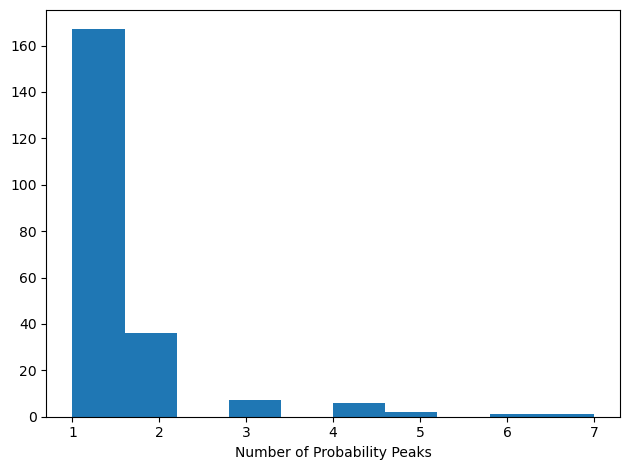

In [3]:
dfpeaks = pd.DataFrame({'peaknum': peaks, 'index': index}).sort_values('index')

fig, ax = plt.subplots()
ax.hist(peaks)
ax.set_xlabel('Number of Probability Peaks')
fig.tight_layout()

In [4]:
np.sum(peaks<=2)/len(peaks)

0.9227272727272727

  value     x   y      ra       dec   
                      deg       deg   
---------- --- --- --------- ---------
 0.0001095 161  74 358.66496   7.49131
3.2498e-05 446 302 199.45698  -0.91174
1.5512e-05  66  64  25.31895   2.79860
8.5308e-06 101  56  15.84567   0.97513
4.0525e-06 509 261 178.67043 -20.16494
 3.829e-06 362 284 223.33786   3.11979
3.1567e-06 400 296 211.24284   0.73533


<WCSAxes: >

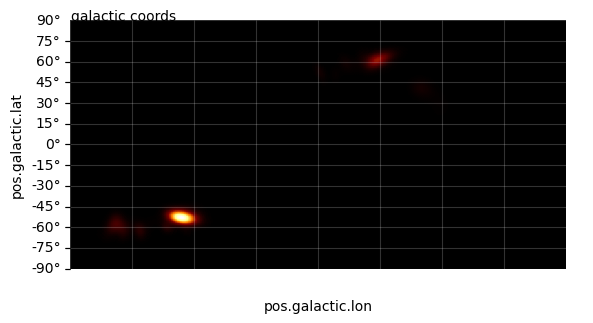

In [5]:
hdul = fits.open('log_distr/flatten/219.fits')
hp = hdul[1].data['PROB']

hpx_geom = HpxGeom(512, frame="galactic")
wcs_geom = WcsGeom.create(frame="galactic")
hpx_map = WcsNDMap.from_geom(hpx_geom, data=hp)
wcs_map = hpx_map.reproject_to_geom(wcs_geom)

# Finds the probability value threshold for 90% confidence by sorting, then adding prob until it reaches 0.9
threshold = np.flip(np.sort(hp))[np.where(np.cumsum(np.flip(np.sort(hp)))<0.9)[0][-1]]

print(find_peaks(wcs_map, threshold, min_distance=10))

wcs_map.plot()

<WCSAxes: >

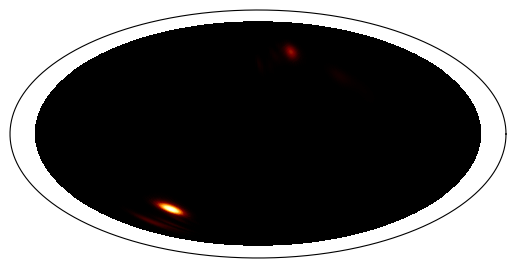

In [6]:
hpx_map.plot()